## DataSet:

Reading a CSV file containing attributes such as name, id, neighbourhood, latitude, longitude and more.

The attribute "Price" is the dependent attribute in our dataset.
        

## Goal:

The purpose of this project is to build a predictive model that can accurately estimate the price for a property based on various features such as latitude, longitude, minimum_nights, number_of_reviews, reviews_per_month, calculated host listings count and availability_365. The model will be trained using the data provided in the csv file and will allow stakeholders to make informed decisions on pricing and property management strategies. The ultimate goal is to improve the efficiency and profitability of the rental market by providing accurate rental price predictions based on the features mentioned above.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model

# Exploratory Data Analysis:

## Reading the dataset into Pandas Dataframe

This code reads the data from the csv file 'dataSP23.csv' and stores it in a Pandas dataframe called 'dataset'. The data is then displayed using the .head() function which shows the first 5 rows of the dataframe. This allows the user to check if the data was loaded correctly and to have a quick overview of the structure of the data.

In [2]:
dataset = pd.read_csv(r"C:\Users\HP\Downloads\dataSP23.csv")
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Clinton Hill Apartment Single Bedroom ! Pratt ~~,30610258,Santiago,Brooklyn,Clinton Hill,40.69591,-73.96284,Private room,58,2,1,9/23/2018,0.10,1,0
1,2,Andy Phillips,6180052,Andrian,Brooklyn,Fort Greene,40.68769,-73.97490,Private room,99,5,4,9/29/2017,0.17,1,250
2,3,"Stylish, Comfortable, and Affordable in Brooklyn",5957027,Zachary,Brooklyn,Crown Heights,40.67667,-73.91750,Entire home/apt,180,2,126,6/14/2019,3.74,1,74
3,4,15 min train ride to Times Sq and US OPEN,101602599,M,Queens,Woodside,40.74340,-73.90588,Entire home/apt,50,1,95,6/24/2019,5.63,2,0
4,5,Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...,106168581,Jason,Brooklyn,South Slope,40.66600,-73.99020,Entire home/apt,210,4,88,7/4/2019,4.41,1,20


# Unnecessary Attributes

We will remove the unnecessary columns from the dataframe. This code uses the drop() function to remove the columns 'id', 'name', 'host_id' and 'last_review' from the dataframe. This is done because these columns are not useful in predicting the price of the listing and can negatively affect the performance of the model.

In [3]:
dataset.drop(labels = ['id', 'name','host_id', 'host_name','last_review'], axis=1, inplace=True)
dataset.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Clinton Hill,40.69591,-73.96284,Private room,58,2,1,0.10,1,0
1,Brooklyn,Fort Greene,40.68769,-73.97490,Private room,99,5,4,0.17,1,250
2,Brooklyn,Crown Heights,40.67667,-73.91750,Entire home/apt,180,2,126,3.74,1,74
3,Queens,Woodside,40.74340,-73.90588,Entire home/apt,50,1,95,5.63,2,0
4,Brooklyn,South Slope,40.66600,-73.99020,Entire home/apt,210,4,88,4.41,1,20



# Checking for attriubutes read as objects in the DataFrame

We'll use the ".info()" method to see how python is thinking about the features of our dataset (numeric versus categorical). We can also use the ".isna().sum()" chain to determine if and where missing values exist. 



In [4]:
dataset.info()
print("\n\n")
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27379 entries, 0 to 27378
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             27379 non-null  object 
 1   neighbourhood                   27379 non-null  object 
 2   latitude                        27379 non-null  float64
 3   longitude                       27379 non-null  float64
 4   room_type                       27379 non-null  object 
 5   price                           27379 non-null  int64  
 6   minimum_nights                  27379 non-null  int64  
 7   number_of_reviews               27379 non-null  int64  
 8   reviews_per_month               21746 non-null  float64
 9   calculated_host_listings_count  27379 non-null  int64  
 10  availability_365                27379 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.3+ MB





neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5633
calculated_host_listings_count       0
availability_365                     0
dtype: int64

# Dropping the null values & the Object Type attributes 

This code uses the .isnull() function to check for missing values in the dataframe. It is important to check for missing values before building the model as they can cause errors or lead to poor model performance. The .sum() function is used to count the number of missing values in each column.

The output will be a list of integers, representing the number of missing values in each column. If any of the columns have missing values, it could be handled by dropping the observations containing missing values, imputing the missing values or using algorithms that can handle missing values.

The output will show the number of missing values in each column of the dataframe, after the removal of any rows with missing values. If all the values are zero, it means that there are no missing values in the dataframe. If there are any non-zero values, it means that there are missing values in the dataframe.

In [5]:
dataset = dataset.dropna()

In [6]:
dataset['price'] = dataset['price'].astype('float64')
dataset['minimum_nights'] = dataset['minimum_nights'].astype('float64')
dataset['number_of_reviews'] = dataset['number_of_reviews'].astype('float64')
dataset['reviews_per_month'] = dataset['reviews_per_month'].astype('float64')
dataset['calculated_host_listings_count'] = dataset['calculated_host_listings_count'].astype('float64')
dataset['availability_365'] = dataset['availability_365'].astype('float64')

dataset = dataset.select_dtypes(exclude=['object'])
dataset.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.69591,-73.96284,58.0,2.0,1.0,0.10,1.0,0.0
1,40.68769,-73.97490,99.0,5.0,4.0,0.17,1.0,250.0
2,40.67667,-73.91750,180.0,2.0,126.0,3.74,1.0,74.0
3,40.74340,-73.90588,50.0,1.0,95.0,5.63,2.0,0.0
4,40.66600,-73.99020,210.0,4.0,88.0,4.41,1.0,20.0


In [7]:
dataset.info()
print("\n\n")
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21746 entries, 0 to 27378
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        21746 non-null  float64
 1   longitude                       21746 non-null  float64
 2   price                           21746 non-null  float64
 3   minimum_nights                  21746 non-null  float64
 4   number_of_reviews               21746 non-null  float64
 5   reviews_per_month               21746 non-null  float64
 6   calculated_host_listings_count  21746 non-null  float64
 7   availability_365                21746 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB





latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Here we see that our objects have been converted to int datatypes and the null values have een dropped. We can move forward now.

In [8]:
dataset.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.69591,-73.96284,58.0,2.0,1.0,0.10,1.0,0.0
1,40.68769,-73.97490,99.0,5.0,4.0,0.17,1.0,250.0
2,40.67667,-73.91750,180.0,2.0,126.0,3.74,1.0,74.0
3,40.74340,-73.90588,50.0,1.0,95.0,5.63,2.0,0.0
4,40.66600,-73.99020,210.0,4.0,88.0,4.41,1.0,20.0


## Putting "price" attribute in the end of the dateset for splitting.

In [9]:
price = dataset['price']
dataset.drop(labels = ['price'], axis=1, inplace=True)

In [10]:
dataset['price'] = price

dataset = dataset[(dataset['price'] > 0) & (dataset['price'] <= 300)]
dataset.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,40.69591,-73.96284,2.0,1.0,0.10,1.0,0.0,58.0
1,40.68769,-73.97490,5.0,4.0,0.17,1.0,250.0,99.0
2,40.67667,-73.91750,2.0,126.0,3.74,1.0,74.0,180.0
3,40.74340,-73.90588,1.0,95.0,5.63,2.0,0.0,50.0
4,40.66600,-73.99020,4.0,88.0,4.41,1.0,20.0,210.0


# Data Visualization

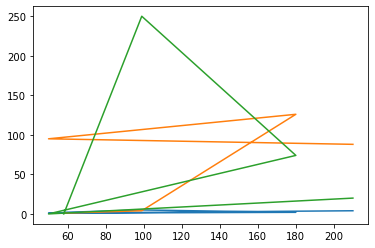

In [11]:
from matplotlib import pyplot as plt

price = dataset['price'].head()
minimum_nights = dataset['minimum_nights'].head()
number_of_reviews = dataset['number_of_reviews'].head()
availability_365 = dataset['availability_365'].head()

plt.plot(price, minimum_nights)
plt.plot(price, number_of_reviews)
plt.plot(price, availability_365)

plt.show()

This code uses the boxplot to check for outliers in the 'price' feature of the dataframe. It is important to check for outliers before building the model as they can cause errors or lead to poor model performance. The boxplot is a standardized way of displaying the distribution of data based on five number summary ("minimum", first quartile (Q1), median, third quartile (Q3), and "maximum").

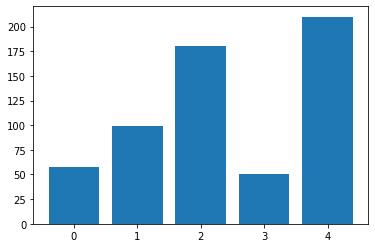

In [12]:
plt.bar(range(len(price)), price)
plt.show()

The output will be a histogram showing the distribution of the 'price' feature in the dataframe. A histogram is a way to visualize the distribution of a continuous variable. If the data is normally distributed, it will be symmetric and bell-shaped. If the data is skewed, the histogram will be skewed either to the left or to the right. A left skewed histogram means that the data has a long tail on the left side and most of the data points are on the right side. A right skewed histogram means that the data has a long tail on the right side and most of the data points are on the left side.

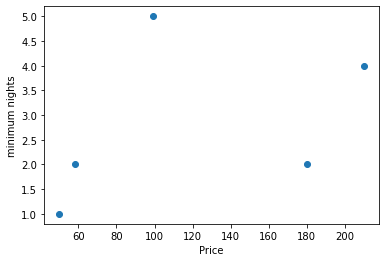

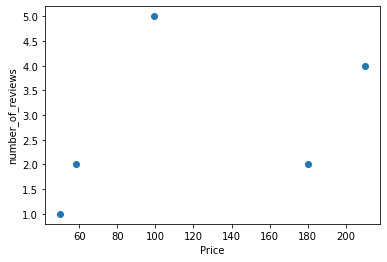

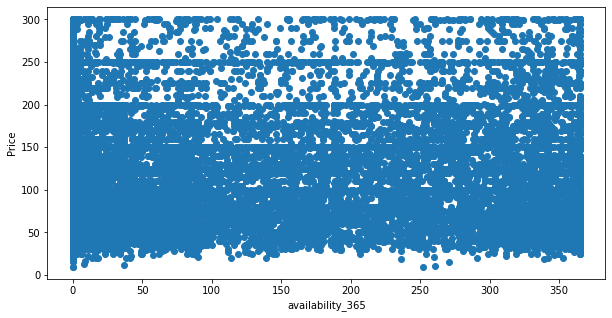

In [13]:
plt.scatter(price,minimum_nights)
plt.xlabel('Price')
plt.ylabel('minimum nights')
plt.show()

plt.scatter(price,minimum_nights)
plt.xlabel('Price')
plt.ylabel('number_of_reviews')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(dataset['availability_365'], dataset['price'])
plt.xlabel('availability_365')
plt.ylabel('Price')
plt.show()

The output will be a scatter plot showing the relationship between availability_365 and price. Each point on the plot represents a listing in the data, with the x-coordinate representing the availability_365 of the listing and the y-coordinate representing the price of the listing. The plot can be used to identify any patterns or outliers in the data, and to understand how availability_365 might be related to price.

This code uses the scatter() function from matplotlib library to visualize the relationship between the minimum_nights feature and the price feature. This helps in understanding how the minimum nights required for a booking (measured by minimum_nights) might be related to the price of the listing. This can be useful in identifying any patterns or outliers in the data and in understanding which features are important in predicting the target variable.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# MODEL CONSTRUCTION

In this section, we will construct a linear model to predict the target variable based on the available predictor variables in our dataset. Our goal is to build a model that accurately predicts the target variable while being as simple as possible. We will use the Linear Regression model from the scikit-learn library to perform our modeling. Linear regression uses the relationship between the data-points to draw a straight line through all them. This line can be used to predict future values.

The code is used to standardize the data by transforming it such that it has a mean of 0 and a standard deviation of 1. This is done to ensure that all features are on the same scale, which can improve the performance of the model.

In [15]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataset)
df_scaled = pd.DataFrame(df_scaled, columns=dataset.columns)
df_scaled_updated = df_scaled.drop(['price'], axis=1)
df_scaled.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,-0.565410,-0.274633,-0.218171,-0.593208,-0.745168,-0.156288,-0.866485,-0.914359
1,-0.712441,-0.530419,-0.053413,-0.531315,-0.704704,-0.156288,1.071926,-0.275873
2,-0.909554,0.687001,-0.218171,1.985677,1.358936,-0.156288,-0.292715,0.985528
3,0.284040,0.933455,-0.273090,1.346113,2.451452,-0.115991,-0.866485,-1.038942
4,-1.100408,-0.854923,-0.108332,1.201696,1.746230,-0.156288,-0.711412,1.452713


The output will be a new dataframe containing the standardized values of each column in the original dataframe. This new dataframe will have a mean of 0 and a standard deviation of 1 for each column. The 'price' column is dropped from the final dataframe as it is the target variable.

Since we've noticed that most properties are priced at a reasonable rate (less than $200 per night), but there are a few which are priced extremely high, we may want to work with the logarithm of price rather than the raw price.

This code is used to evaluate the performance of the linear regression model. The mean squared error (MSE) and coefficient of determination (R^2) are two common metrics used to evaluate regression models. The MSE measures the average of the squares of the errors (prediction errors) made by the model, while the R^2 score is a measure of how well the model fits the data.

## INFORMATION ABOUT TEST AND TRAIN DATA

To split the dataframe into 2 sets, X_train and X_test for the purpose of training, testing and validating the model. Splitting the data into different sets helps to prevent overfitting and allows for a more accurate evaluation of the model's performance.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled_updated, df_scaled['price'], test_size=0.2, random_state=42)

In [17]:
# Print test and train set shapes
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

# Print X and y columns
print("X_train columns: ", X_train.columns)
print("y_train columns: ", y_train.name)

X_train shape:  (16420, 7)
X_test shape:  (4105, 7)
X_train columns:  Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
y_train columns:  price


The output will be four variables: X_train, X_test, y_train and y_test, which correspond to the features and the label for the respective sets for training and testing. X_safe is the validation set. This code will split the data into 80% training and 20% testing.

# LINEAR REGRESSION MODEL

To train a Linear Regression model on the dataset, which will be used to predict the target variable (price) based on the other features.

The output of this code will be the values of the MSE and R^2 score for the linear regression model. The MSE value represents the average of the squared errors made by the model, while the R^2 score is a measure of how well the model fits the data. A low MSE value and a high R^2 score indicate a better model fit and more accurate predictions.

In [18]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Mean squared error

Mean squared error (MSE): measures the average squared difference between the predicted and actual values. It gives an idea of how well the model fits the data.

In [19]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.88
Coefficient of determination: 0.12


# Root mean squared error

Root mean squared error (RMSE): the square root of the mean squared error. It is in the same units as the target variable and gives an idea of the average difference between predicted and actual values.

In [20]:
# RMSE 

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean squared error: %.2f" %rmse)

Root Mean squared error: 0.94


# Mean Absolute Error 

Mean absolute error (MAE): measures the average absolute difference between the predicted and actual values. It is less sensitive to outliers than the mean squared error.

In [21]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  0.7505955114092417


# CORRELATION

Correlation is a statistical measure that indicates the degree of association between two variables. In the context of linear regression, correlation is often used to measure the strength and direction of the relationship between the independent variable (or predictor variable) and the dependent variable (or response variable).

In particular, the correlation coefficient is a numerical measure that ranges from -1 to 1, with a value of 0 indicating no correlation, a value of 1 indicating a perfect positive correlation (meaning the two variables increase or decrease together), and a value of -1 indicating a perfect negative correlation (meaning the two variables move in opposite directions).

When building a linear regression model, it is important to consider the correlation between the independent and dependent variables, as a high degree of correlation can indicate potential problems such as multicollinearity or overfitting. It is also important to note that correlation does not imply causation, and further analysis and interpretation is needed to determine the nature of the relationship between the variables.

# The result array represents the coefficient values of All columns.

That means, if the value of the particular columns increase by "1". The price attribute will be effected by the value given above.

The output will show the coefficients and intercept of the trained Linear Regression model. The coefficients represent the relationship between each feature and the target variable, and the intercept is the point at which the regression line intersects the y-axis when all feature values are zero. These values can be used to understand the relationship between features and target variable and make predictions based on new data.

In [22]:
# Print the coefficients

print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [ 0.08195221 -0.3108597  -0.01270402 -0.00782292 -0.00309677  0.08825997
  0.06081593]
Intercept:  0.000967593648273085


# Cross-validation on the linear regression model

In [23]:
from sklearn.model_selection import cross_val_score

# Create a new linear regression model
a = linear_model.LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(a, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation scores: ", scores)

# Print the average R2 score across all folds
print("Average R2 score: ", scores.mean())

Cross-validation scores:  [0.1332078  0.08920125 0.1150291  0.10965521 0.10689729]
Average R2 score:  0.1107981293503737


# P-values: 
P-values associated with the coefficients can help determine whether each independent variable is statistically significant in predicting the dependent variable.

In [24]:
# Calculate p-values using statsmodels
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()
pvalues = results.pvalues[1:]
print("\nP-values:\n", pvalues)


P-values:
 latitude                          1.602589e-28
longitude                         0.000000e+00
minimum_nights                    1.027000e-01
number_of_reviews                 3.740243e-01
reviews_per_month                 7.293141e-01
calculated_host_listings_count    3.234154e-33
availability_365                  7.977032e-15
dtype: float64


# Residuals:
The residuals are the differences between the actual values of the dependent variable and the predicted values from the model. Analyzing the residuals can help detect any patterns or trends in the data that are not captured by the model.

In [25]:
# Calculate residuals

residuals = y_test - y_pred
print("\nResiduals:\n", residuals)


Residuals:
 1272    -0.261602
3222    -0.056474
6421     1.055562
7792     0.191882
11702   -0.400175
           ...   
6815     0.480821
8203     0.403125
15594   -0.393196
16037   -0.838823
15473   -0.743059
Name: price, Length: 4105, dtype: float64


# Multicollinearity:
Linear regression models can also detect multicollinearity, which occurs when the independent variables are highly correlated with each other. This can lead to unstable estimates of the coefficients and reduce the model's predictive power.

In [26]:
# Detect multicollinearity using VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature

vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("\nVIF:\n", vif)


VIF:
                          features       VIF
0                        latitude  1.014098
1                       longitude  1.059464
2                  minimum_nights  1.040234
3               number_of_reviews  1.470621
4               reviews_per_month  1.479506
5  calculated_host_listings_count  1.061772
6                availability_365  1.130014


# Confidence intervals
They are a range of values that is likely to contain the true value of a population parameter with a certain level of confidence. In the context of linear regression, we can calculate the confidence intervals for the regression coefficients to get an idea of how precise our estimate is.

In [27]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit OLS model
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print(model.summary())

# Calculate confidence intervals for coefficients
ci = model.conf_int()
ci.columns = ['Lower CI', 'Upper CI']
ci['Coefficients'] = model.params
print(ci)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     297.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:04:34   Log-Likelihood:                -22328.
No. Observations:               16420   AIC:                         4.467e+04
Df Residuals:                   16412   BIC:                         4.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# Fitting a Linear Model on Scaled Predictors
There's nothing new here -- we fit our regression model the same way as we did earlier -- just now we have numerical predictors which are all standardized to have mean 0 and standard deviation 1.


In [28]:
X_train_num = X_train.iloc[:, :2]
X_test_num = X_test.iloc[:, :2]


sc = StandardScaler()
sc.fit(X_train_num)
X_train_num_scaled = sc.transform(X_train_num)
X_test_num_scaled = sc.transform(X_test_num)


X_train_num_scaled

array([[ 0.        , -0.298024  ],
       [ 0.        ,  0.51892089],
       [ 0.        ,  1.47918319],
       ...,
       [ 0.        , -0.06165723],
       [ 0.        ,  1.20342196],
       [ 0.        , -1.46951905]])

In [29]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


scaled_reg = linear_model.LinearRegression()  # Create a instance for Linear Regression model
scaled_reg.fit(X_train_scaled, y_train)  # Fit data to the model


#Print the coefficients
print("Intercept: ", scaled_reg.intercept_)
print(pd.DataFrame({"Predictor" : X_train_scaled.columns, "Coefficient" : scaled_reg.coef_}))


#Compute performance metrics
meanErrorTrainScaled = (y_train - scaled_reg.predict(X_train_scaled)).mean()
meanAbsoluteErrorTrainScaled = (abs(y_train - scaled_reg.predict(X_train_scaled))).mean()
trainRMSEscaled = (((y_train - scaled_reg.predict(X_train_scaled))**2).mean())**0.5


meanErrorTestScaled = (y_test - scaled_reg.predict(X_test_scaled)).mean()
meanAbsoluteErrorTestScaled = (abs(y_test - scaled_reg.predict(X_test_scaled))).mean()
testRMSEscaled = (((y_test - scaled_reg.predict(X_test_scaled))**2).mean())**0.5


#Print out training error metrics
print("\nTraining Error Metrics")
print("\t The mean error on the training set is: ", meanErrorTrainScaled)
print("\t The mean absolute error on the test set is: ", meanAbsoluteErrorTrainScaled)
print("\t The training RMSE is: ", trainRMSEscaled)

#Print out test error metrics
print("\nTest Error Metrics")
print("\t The mean error on the test set is: ", meanErrorTestScaled)
print("\t The mean absolute error on the test set is: ", meanAbsoluteErrorTestScaled)
print("\t The test RMSE is: ", testRMSEscaled)


Intercept:  0.000967593648273095
                        Predictor  Coefficient
0                           const     0.000000
1                        latitude     0.081952
2                       longitude    -0.310860
3                  minimum_nights    -0.012704
4               number_of_reviews    -0.007823
5               reviews_per_month    -0.003097
6  calculated_host_listings_count     0.088260
7                availability_365     0.060816

Training Error Metrics
	 The mean error on the training set is:  -8.411190271825181e-18
	 The mean absolute error on the test set is:  0.7542737486929333
	 The training RMSE is:  0.9425622472747378

Test Error Metrics
	 The mean error on the test set is:  -0.004837968241074985
	 The mean absolute error on the test set is:  0.7505955114092413
	 The test RMSE is:  0.9375967921181423


# Computing performance metrics

In [30]:
X_train = dataset.drop("price", axis = 1)
y_train = dataset["price"]
X_test = dataset.drop("price", axis = 1)
y_test = dataset["price"]

#Instantiate, fit, and validate regressor
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)


#Compute performance metrics
meanErrorTrain = (y_train - lin_reg.predict(X_train)).mean()
meanAbsoluteErrorTrain = (abs(y_train - lin_reg.predict(X_train))).mean()
trainRMSE = (((y_train - lin_reg.predict(X_train))**2).mean())**0.5


meanErrorTest = (y_test - lin_reg.predict(X_test)).mean()
meanAbsoluteErrorTest = (abs(y_test - lin_reg.predict(X_test))).mean()
testRMSE = (((y_test - lin_reg.predict(X_test))**2).mean())**0.5

#Print out training error metrics
print("\nTraining Error Metrics")
print("\t The mean error on the training set is: ", meanErrorTrain)
print("\t The mean absolute error on the test set is: ", meanAbsoluteErrorTrain)
print("\t The training RMSE is: ", trainRMSE)


#Print out test error metrics
print("\nTest Error Metrics")
print("\t The mean error on the test set is: ", meanErrorTest)
print("\t The mean absolute error on the test set is: ", meanAbsoluteErrorTest)
print("\t The test RMSE is: ", testRMSE)



Training Error Metrics
	 The mean error on the training set is:  -1.6724953970142463e-12
	 The mean absolute error on the test set is:  48.37907925085337
	 The training RMSE is:  60.4607050260595

Test Error Metrics
	 The mean error on the test set is:  -1.6724953970142463e-12
	 The mean absolute error on the test set is:  48.37907925085337
	 The test RMSE is:  60.4607050260595


# Predicting the "price" based on only a few selected columns from the dataset.

We can predict the values based on a few selected columns too, In the below example, We are using the "number_of_reviews" and "reviews_per_month" to predict the "Price". In this way, we can use any of the columns.

In [31]:
S_C_LR = linear_model.LinearRegression()

selected_column = S_C_LR.fit(X_train[['number_of_reviews', 'reviews_per_month']] , y_train )

selected_X_test = X_test[['number_of_reviews', 'reviews_per_month']]

selected_column_pred = S_C_LR.predict(selected_X_test)

print("Intercept: ", S_C_LR.intercept_)

Intercept:  118.72699959529407


# Outliers analysis

To perform outliers analysis in the linear regression model, we can use the residuals of the model. Residuals are the differences between the actual and predicted values of the dependent variable. Outliers are the data points that have large residuals, indicating that they are not well predicted by the model. We can use various methods to identify outliers, such as visual inspection of residuals plots, leverage plots, Cook's distance, and more

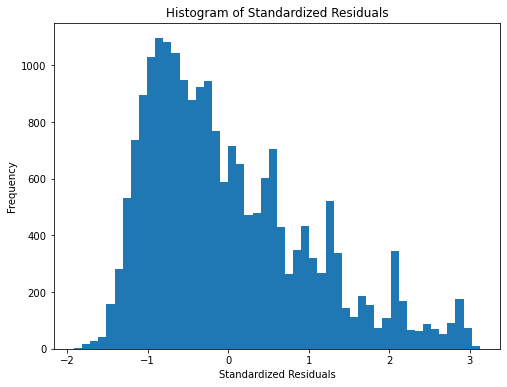

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Calculate the residuals and standardized residuals
residuals = model.resid
std_resid = model.get_influence().resid_studentized_internal
fitted_value = model.fittedvalues

# Plot the histogram of standardized residuals
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(std_resid, bins=50)
ax.set_title("Histogram of Standardized Residuals")
ax.set_xlabel("Standardized Residuals")
ax.set_ylabel("Frequency")
plt.show()

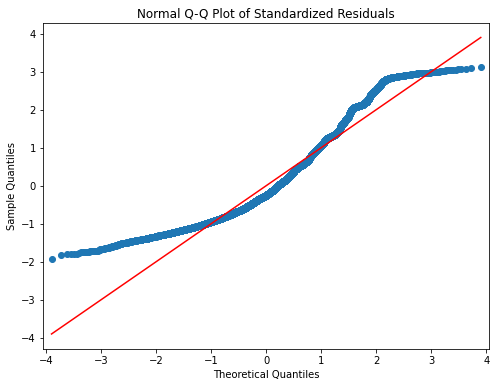

In [33]:
# Plot the QQ-plot of standardized residuals

fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(std_resid, line='s', ax=ax)
ax.set_title("Normal Q-Q Plot of Standardized Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
plt.show()

The above code calculates the residuals and standardized residuals of the linear regression model and plots the histogram and QQ-plot of the standardized residuals. These plots help us to check if the residuals are normally distributed, which is one of the assumptions of linear regression.

The code also plots the leverage plot, which helps us to identify the data points with high leverage. High leverage data points can have a large influence on the regression line and may be outliers.

### We can also use Cook's distance to identify influential data points:

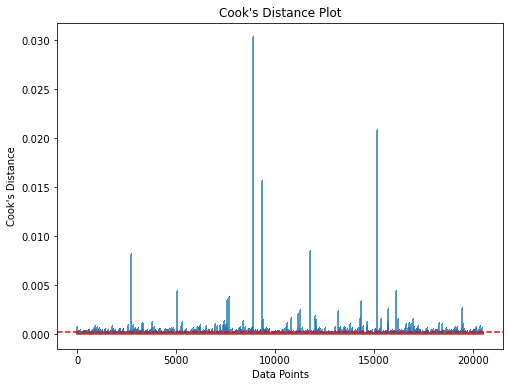

In [34]:
# Calculate Cook's distance
infl = model.get_influence()
(c, p) = infl.cooks_distance

# Plot Cook's distance
fig, ax = plt.subplots(figsize=(8, 6))
ax.stem(c, markerfmt=",")

# Set the threshold for influential points
ax.axhline(y=4/len(y_train), linestyle='--', color='r')
ax.set_title("Cook's Distance Plot")
ax.set_xlabel("Data Points")
ax.set_ylabel("Cook's Distance")
plt.show()